In [1]:
import time
import numpy as np
import pandas as pd
from BLP import BLP
from data_cleaning import Data 

## Bonus

In [2]:
data_loader = Data('docs/Python_codes/')
data_loader.load_data()

Object vcov dimensions: (22, 22)
Object se dimensions: (22,)
Object theta2w dimensions:     (3,)
Object t dimensions:     ()
Optimum value of the GMM objective function: 742.1299672402382
running time: 90.9199481010437


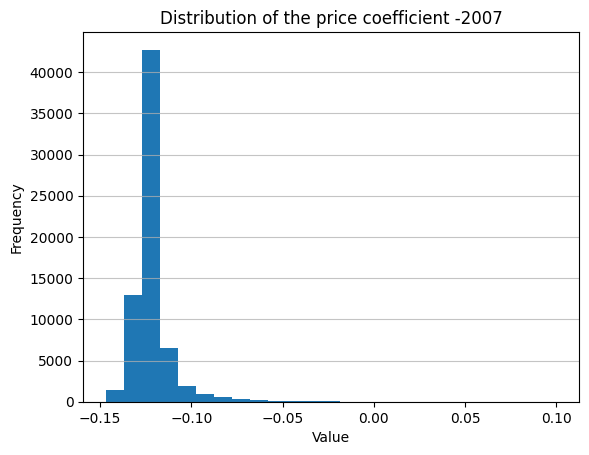

In [3]:
starttime = time.time()

#maximum number of iterations for convergence of mval-mvalold contraction
niter = 2500

#initial guess for coefficients
theta2w = np.array([0.50,-0.5,0.5])
#theta2w = np.array([0.20,-0.01,0.01,-0.5,0.05,0.05])

#maximum tolerance
mtol= 1e-5

#set optimization options
options={'disp': None,'maxiter': 100,'xatol':0.0001,'fatol':0.0001}

#get output
blp = BLP(data_loader,theta2w,mtol,niter)
init_theta = blp.init_theta(theta2w)
res = blp.iterate_optimization(opt_func=blp.gmmobj,param_vec=init_theta,jac=blp.gradobj,options=options)
blp.results(res)

endtime=time.time()
run = endtime-starttime
print('running time: ' + str(endtime-starttime))
a=time.time()

### Derivative based algorithm

Object vcov dimensions: (22, 22)
Object se dimensions: (22,)
Object theta2w dimensions:     (3,)
Object t dimensions:     ()
Optimum value of the GMM objective function: 9018.216270846347


/Users/andreadonazzan/PycharmProjects/Empirical-IO-Computational-Assignment/BLP.py:318: RuntimeWarning: divide by zero encountered in divide
  denom1 = 1. / (1. + sum2)


this is the gradient [[ 4.99862326e+00]
 [ 3.36617797e+04]
 [-6.10715432e+02]]
running time: 23.751149892807007


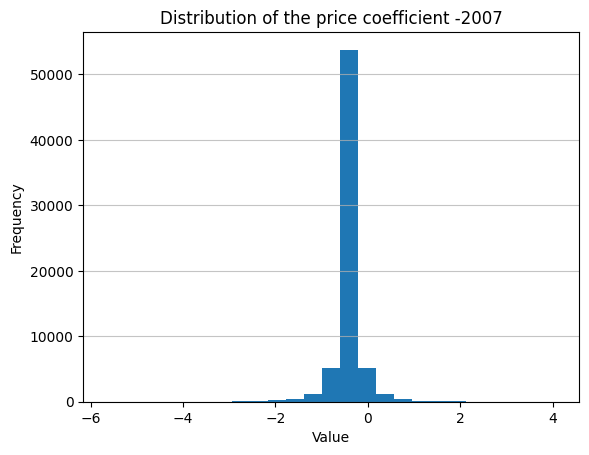

In [4]:
gradient_list = []
results_list = []

starttime = time.time()
niter = 2500

#initial guess for coefficients
theta2w = np.array([0.50,-0.5,0.5])

#maximum tolerance
mtol= 1e-5

# Options for L-BFGS-B
options={'disp': None,'maxiter': 100,'gtol': 1e-5}

#get output
blp = BLP(data_loader,theta2w,mtol,niter,method='L-BFGS-B')
init_theta = blp.init_theta(theta2w)
res = blp.iterate_optimization(opt_func=blp.gmmobj,param_vec=init_theta,jac=blp.gradobj,options=options)
blp.results(res)

gradient_list.append(blp.gradobj(res))
results_list.append(blp.fval_results)

endtime=time.time()
print('running time: ' + str(endtime-starttime))

#### Different initial guesses

Object vcov dimensions: (22, 22)
Object se dimensions: (22,)
Object theta2w dimensions:     (3,)
Object t dimensions:     ()
Optimum value of the GMM objective function: 742.7398893451948
this is the gradient [[  3.33393406]
 [-99.83722591]
 [  9.78282519]]
Object vcov dimensions: (22, 22)
Object se dimensions: (22,)
Object theta2w dimensions:     (3,)
Object t dimensions:     ()
Optimum value of the GMM objective function: 5786.973904456505


/Users/andreadonazzan/PycharmProjects/Empirical-IO-Computational-Assignment/BLP.py:318: RuntimeWarning: divide by zero encountered in divide
  denom1 = 1. / (1. + sum2)


this is the gradient [[ 2.31215848e+00]
 [ 2.63752126e+04]
 [-2.96192695e+02]]
Object vcov dimensions: (22, 22)
Object se dimensions: (22,)
Object theta2w dimensions:     (3,)
Object t dimensions:     ()
Optimum value of the GMM objective function: 1008.1936244423953
this is the gradient [[-4.62540986e-01]
 [ 5.57005302e+03]
 [-1.86115216e+02]]
Object vcov dimensions: (22, 22)
Object se dimensions: (22,)
Object theta2w dimensions:     (3,)
Object t dimensions:     ()
Optimum value of the GMM objective function: 12657.683916196378


/Users/andreadonazzan/PycharmProjects/Empirical-IO-Computational-Assignment/BLP.py:318: RuntimeWarning: divide by zero encountered in divide
  denom1 = 1. / (1. + sum2)


this is the gradient [[-5.87137000e+00]
 [ 4.03978766e+04]
 [-6.94934627e+02]]
Object vcov dimensions: (22, 22)
Object se dimensions: (22,)
Object theta2w dimensions:     (3,)
Object t dimensions:     ()
Optimum value of the GMM objective function: 1044.704189206972
this is the gradient [[3.29981432e+00]
 [4.96833862e+03]
 [2.48936483e+02]]


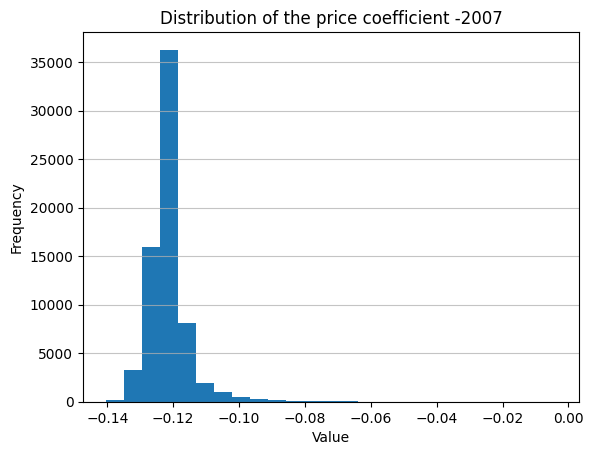

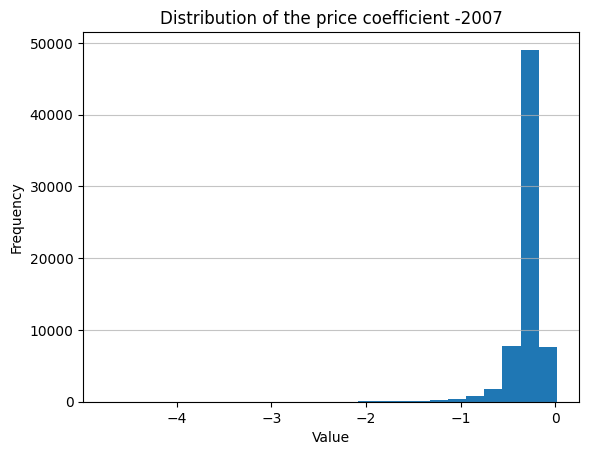

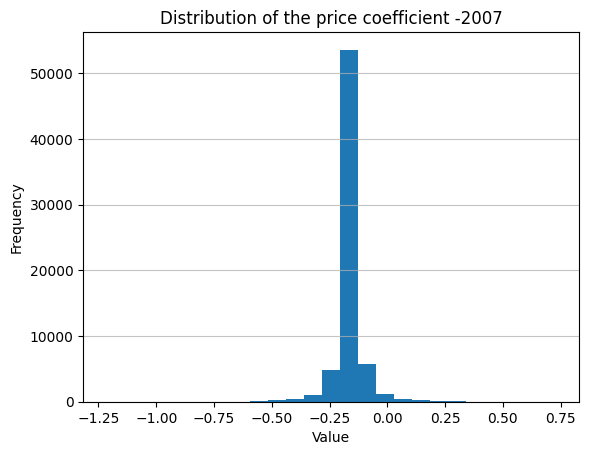

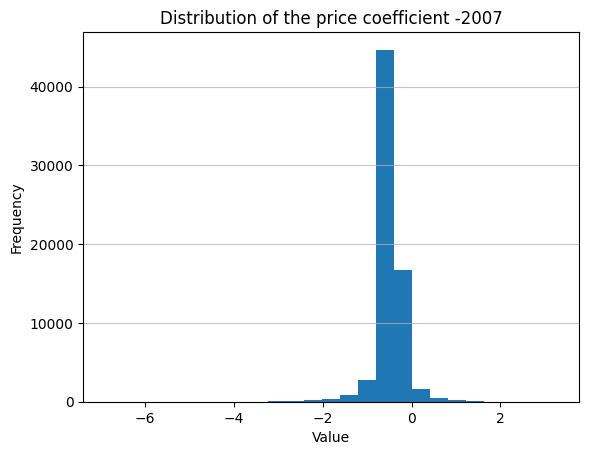

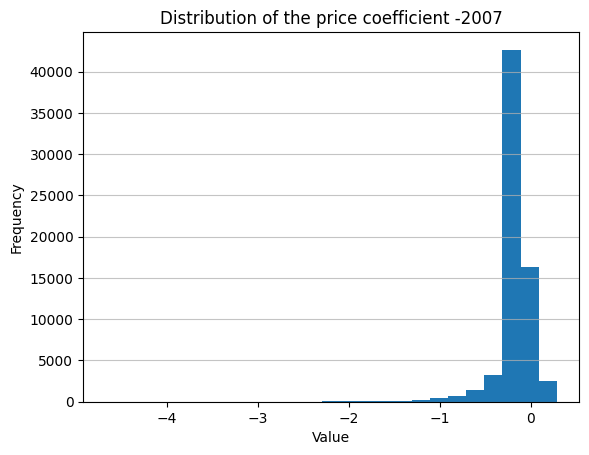

In [5]:
initial_guesses = [
    np.array([-0.20,0.01,0.01]),
    np.array([0.20,-0.40,0.01]),
    np.array([0.60,-0.10,0.10]),
    np.array([0.10,-0.60,0.40]),
    np.array([0.10,-0.10,-0.50])
]

niter = 2500
mtol= 1e-5
options={'disp': None,'maxiter': 100,'gtol': 1e-5}

for theta0 in initial_guesses:
    blp = BLP(data_loader,theta0,mtol,niter,method='L-BFGS-B')
    init_theta = blp.init_theta(theta0)
    res = blp.iterate_optimization(opt_func=blp.gmmobj,param_vec=init_theta,jac=blp.gradobj,options=options)
    blp.results(res)
    results_list.append(blp.fval_results)
    gradient_list.append(blp.gradobj(res))

#### Increased tolerace of contraction mapping

Object vcov dimensions: (22, 22)
Object se dimensions: (22,)
Object theta2w dimensions:     (3,)
Object t dimensions:     ()
Optimum value of the GMM objective function: 744.9689211542698
this is the gradient [[ 0.43147378]
 [-4.84788425]
 [ 1.38843667]]


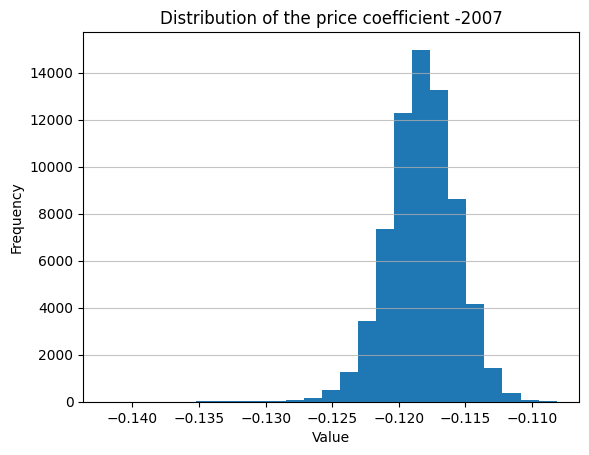

In [6]:
niter = 2500
mtol = 1e-10

#initial guess for coefficients
theta2w = np.array([0.50,-0.5,0.5])

# Options for L-BFGS-B
options={'disp': None,'maxiter': 100,'gtol': 1e-5}

#get output
blp = BLP(data_loader,theta2w,mtol,niter,method='L-BFGS-B')
init_theta = blp.init_theta(theta2w)
res = blp.iterate_optimization(opt_func=blp.gmmobj,param_vec=init_theta,jac=blp.gradobj,options=options)
blp.results(res)
gradient_list.append(blp.gradobj(res))
results_list.append(blp.fval_results)

Object vcov dimensions: (22, 22)
Object se dimensions: (22,)
Object theta2w dimensions:     (3,)
Object t dimensions:     ()
Optimum value of the GMM objective function: 899.8126310437887
this is the gradient [[    2.07370611]
 [-1964.62318006]
 [ -598.7366686 ]]


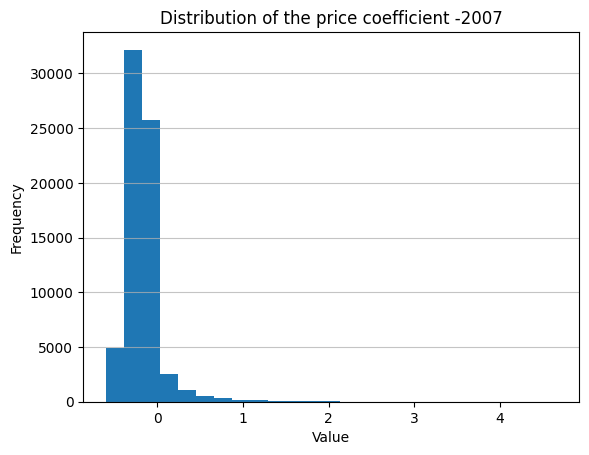

In [7]:
niter = 2500
mtol = 1e-8

#initial guess for coefficients
theta2w = np.array([0.50,-0.5,0.5])

# Options for L-BFGS-B
options={'disp': None,'maxiter': 100,'gtol': 1e-5}

#get output
blp = BLP(data_loader,theta2w,mtol,niter,method='L-BFGS-B')
init_theta = blp.init_theta(theta2w)
res = blp.iterate_optimization(opt_func=blp.gmmobj,param_vec=init_theta,jac=blp.gradobj,options=options)
blp.results(res)
gradient_list.append(blp.gradobj(res))
results_list.append(blp.fval_results)

In [14]:
gradients = np.vstack([g.ravel() for g in gradient_list]) 

row_labels = ['Initial guess', f'Guess: {initial_guesses[0]}', f'Guess: {initial_guesses[1]}', f'Guess: {initial_guesses[2]}', f'Guess: {initial_guesses[3]}', f'Guess: {initial_guesses[4]}', 'Initial guess', 'Initial guess']
tolerance_labels = ['1e-5', '1e-5', '1e-5', '1e-5', '1e-5', '1e-5', '1e-10', '1e-8']
col_labels = ["g1", "g2", "g3"]

df = pd.DataFrame(gradients, index=row_labels, columns=col_labels)
df['GMM Value'] = results_list
df['Tolerance'] = tolerance_labels
df = df[['Tolerance'] + ['GMM Value'] + col_labels]
latex_str = df.to_latex(
    float_format="%.2e",                 # scientific notation
    column_format="llrrrr"                 # 1 index col + 3 value cols
)
with open("blp_results.tex", "w") as f:
    f.write(latex_str)
df

,Tolerance,GMM Value,g1,g2,g3
Initial guess,1e-5,9018.216271,4.998623,33661.779711,-610.715432
Guess: [-0.2 0.01 0.01],1e-5,742.739889,3.333934,-99.837226,9.782825
Guess: [ 0.2 -0.4 0.01],1e-5,5786.973904,2.312158,26375.212628,-296.192695
Guess: [ 0.6 -0.1 0.1],1e-5,1008.193624,-0.462541,5570.053022,-186.115216
Guess: [ 0.1 -0.6 0.4],1e-5,12657.683916,-5.871370,40397.876584,-694.934627
Guess: [ 0.1 -0.1 -0.5],1e-5,1044.704189,3.299814,4968.338616,248.936483
Initial guess,1e-10,744.968921,0.431474,-4.847884,1.388437
Initial guess,1e-8,899.812631,2.073706,-1964.623180,-598.736669
